In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import pandas_profiling

pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", 200)

In [53]:
DATA_DIR = '../input/'

In [54]:
df = pd.read_csv(DATA_DIR+'train_2018.csv')
print(df.shape)
df.head()

(464, 36)


,id,team,No,name,time_played,position,birthdate,height,weight,salary,nth_year,is_youth,nationality,j1_total_num_played,j1_total_scores,j2_total_num_played,j2_total_scores,j3_total_num_played,j3_total_scores,na_total_num_played,na_total_scores,prev3_team,prev2_team,prev1_team,prev3_div,prev2_div,prev1_div,prev3_num_played,prev2_num_played,prev1_num_played,prev3_scores,prev2_scores,prev1_scores,prev3_time_played,prev2_time_played,prev1_time_played
0,2,C大阪,2.0,松田 陸,2524.0,DF,1991-07-24,171.0,69.0,2000,3.0,NaN,NaN,47.0,3.0,42.0,2.0,NaN,NaN,NaN,NaN,FC東京,C大阪,C大阪,1,2,1,9,42,31,0,2,2,473,3733,2662
1,5,C大阪,5.0,田中 裕介,279.0,DF,1986-04-14,181.0,77.0,2700,4.0,NaN,NaN,223.0,10.0,42.0,1.0,NaN,NaN,NaN,NaN,C大阪,C大阪,C大阪,2,2,1,9,33,18,1,0,0,664,2725,492
2,6,C大阪,6.0,山口 蛍,2970.0,MF,1990-10-06,173.0,72.0,6700,10.0,1.0,NaN,134.0,12.0,58.0,2.0,NaN,NaN,38.0,2.0,C大阪・GER,C大阪,C大阪,2,2,1,35,19,32,1,1,2,3150,1800,2880
3,7,C大阪,7.0,水沼 宏太,1671.0,MF,1990-02-22,176.0,72.0,3000,2.0,NaN,NaN,194.0,24.0,50.0,7.0,9.0,3.0,NaN,NaN,鳥栖,FC東京,C大阪,1,1,1,32,17,24,7,1,3,2353,570,1901
4,8,C大阪,8.0,柿谷 曜一朗,1424.0,FW,1990-01-03,177.0,68.0,7200,10.0,1.0,NaN,113.0,39.0,168.0,23.0,NaN,NaN,18.0,5.0,SUI,C大阪,C大阪,9,2,1,4,20,34,1,5,6,-,1635,2918


In [67]:
df[["team","prev1_team","prev2_team","prev3_team"]].apply(lambda d: d.str.contains("FC|C|鳥")).sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
459    0
460    0
461    0
462    0
463    0
Length: 464, dtype: int64

In [50]:
col = "salary"
df[col] = df[col].replace("-", 0)
df[col] = df[col].fillna(0)
df[col] = df[col].astype("float")

df_team_mean = df.groupby(["team", "position"])[[col]].mean().rename(columns={col: f"{col}_mean_team"}).reset_index()
df_team_mean

,team,position,salary_mean_team
0,C大阪,DF,3383.333333
1,C大阪,FW,4925.000000
2,C大阪,GK,10000.000000
3,C大阪,MF,4992.857143
4,FC東京,DF,4328.571429
...,...,...,...
67,鳥栖,MF,2353.333333
68,鹿島,DF,2616.363636
69,鹿島,FW,3130.000000
70,鹿島,GK,4133.333333


In [51]:
df = df.merge(df_team_mean, on=["team", "position"], how="left")
df[f"relative_team_{col}"] = df[col] / df[f"{col}_mean_team"]
df = df.drop([f"{col}_mean_team"], axis=1)
df

,id,team,No,name,time_played,position,birthdate,height,weight,salary,nth_year,is_youth,nationality,j1_total_num_played,j1_total_scores,j2_total_num_played,j2_total_scores,j3_total_num_played,j3_total_scores,na_total_num_played,na_total_scores,prev3_team,prev2_team,prev1_team,prev3_div,prev2_div,prev1_div,prev3_num_played,prev2_num_played,prev1_num_played,prev3_scores,prev2_scores,prev1_scores,prev3_time_played,prev2_time_played,prev1_time_played,relative_team_salary
0,2,C大阪,2.0,松田 陸,2524.0,DF,1991-07-24,171.0,69.0,2000.0,3.0,NaN,NaN,47.0,3.0,42.0,2.0,NaN,NaN,NaN,NaN,FC東京,C大阪,C大阪,1,2,1,9,42,31,0,2,2,473,3733,2662,0.591133
1,5,C大阪,5.0,田中 裕介,279.0,DF,1986-04-14,181.0,77.0,2700.0,4.0,NaN,NaN,223.0,10.0,42.0,1.0,NaN,NaN,NaN,NaN,C大阪,C大阪,C大阪,2,2,1,9,33,18,1,0,0,664,2725,492,0.798030
2,6,C大阪,6.0,山口 蛍,2970.0,MF,1990-10-06,173.0,72.0,6700.0,10.0,1.0,NaN,134.0,12.0,58.0,2.0,NaN,NaN,38.0,2.0,C大阪・GER,C大阪,C大阪,2,2,1,35,19,32,1,1,2,3150,1800,2880,1.341917
3,7,C大阪,7.0,水沼 宏太,1671.0,MF,1990-02-22,176.0,72.0,3000.0,2.0,NaN,NaN,194.0,24.0,50.0,7.0,9.0,3.0,NaN,NaN,鳥栖,FC東京,C大阪,1,1,1,32,17,24,7,1,3,2353,570,1901,0.600858
4,8,C大阪,8.0,柿谷 曜一朗,1424.0,FW,1990-01-03,177.0,68.0,7200.0,10.0,1.0,NaN,113.0,39.0,168.0,23.0,NaN,NaN,18.0,5.0,SUI,C大阪,C大阪,9,2,1,4,20,34,1,5,6,-,1635,2918,1.461929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,739,名古屋,29.0,和泉 竜司,2139.0,MF,1993-11-06,173.0,72.0,1400.0,3.0,NaN,NaN,14.0,1.0,39.0,1.0,NaN,NaN,NaN,NaN,名古屋,名古屋,名古屋,1,1,2,0,14,39,0,1,1,0,816,3270,0.621915
460,740,名古屋,30.0,松本 孝平,0.0,FW,1994-07-31,186.0,85.0,480.0,2.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,-,-,名古屋,-,-,2,-,-,0,-,-,0,-,-,0,0.067773
461,742,名古屋,32.0,深堀 隼平,106.0,FW,1998-06-29,178.0,72.0,400.0,2.0,1.0,NaN,0.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,-,名古屋,名古屋,-,1,2,-,0,2,-,0,0,-,0,60,0.056477
462,743,名古屋,33.0,梶山 幹太,0.0,MF,1998-04-24,167.0,63.0,380.0,2.0,1.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-,名古屋,名古屋,-,1,1,-,0,0,-,0,0,-,0,0,0.168806


In [27]:
df["id"] = np.random.permutation(df["id"].values)
df.head()

,id,team,No,name,time_played,position,birthdate,height,weight,salary,nth_year,is_youth,nationality,j1_total_num_played,j1_total_scores,j2_total_num_played,j2_total_scores,j3_total_num_played,j3_total_scores,na_total_num_played,na_total_scores,prev3_team,prev2_team,prev1_team,prev3_div,prev2_div,prev1_div,prev3_num_played,prev2_num_played,prev1_num_played,prev3_scores,prev2_scores,prev1_scores,prev3_time_played,prev2_time_played,prev1_time_played
0,213,C大阪,2.0,松田 陸,2524.0,DF,1991-07-24,171.0,69.0,2000,3.0,NaN,NaN,47.0,3.0,42.0,2.0,NaN,NaN,NaN,NaN,FC東京,C大阪,C大阪,1,2,1,9,42,31,0,2,2,473,3733,2662
1,298,C大阪,5.0,田中 裕介,279.0,DF,1986-04-14,181.0,77.0,2700,4.0,NaN,NaN,223.0,10.0,42.0,1.0,NaN,NaN,NaN,NaN,C大阪,C大阪,C大阪,2,2,1,9,33,18,1,0,0,664,2725,492
2,413,C大阪,6.0,山口 蛍,2970.0,MF,1990-10-06,173.0,72.0,6700,10.0,1.0,NaN,134.0,12.0,58.0,2.0,NaN,NaN,38.0,2.0,C大阪・GER,C大阪,C大阪,2,2,1,35,19,32,1,1,2,3150,1800,2880
3,663,C大阪,7.0,水沼 宏太,1671.0,MF,1990-02-22,176.0,72.0,3000,2.0,NaN,NaN,194.0,24.0,50.0,7.0,9.0,3.0,NaN,NaN,鳥栖,FC東京,C大阪,1,1,1,32,17,24,7,1,3,2353,570,1901
4,735,C大阪,8.0,柿谷 曜一朗,1424.0,FW,1990-01-03,177.0,68.0,7200,10.0,1.0,NaN,113.0,39.0,168.0,23.0,NaN,NaN,18.0,5.0,SUI,C大阪,C大阪,9,2,1,4,20,34,1,5,6,-,1635,2918


In [4]:
df["salary"].value_counts(dropna=False)

480      24
3000     23
2000     20
4000     18
600      16
         ..
440       1
7200      1
4800      1
9200      1
12000     1
Name: salary, Length: 82, dtype: int64

In [22]:
year = 2019
df_prev = pd.read_csv(DATA_DIR+f'test.csv')
df["salary"] = df["salary"].replace("-", 0).astype("int") 

df_prev = pd.read_csv(DATA_DIR+f'train_{year-1}.csv')
df_prev["salary"] = df_prev["salary"].replace("-", 0).astype("int") 

In [23]:
df.loc[df_prev["salary"]!=0, "salary"] / df_prev.loc[df_prev["salary"]!=0, "salary"]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
459    1.0
460    1.0
461    1.0
462    1.0
463    1.0
Name: salary, Length: 463, dtype: float64

In [11]:
df["salary"].replace("-", 0).astype("int") 

0      2000
1      2700
2      6700
3      3000
4      7200
       ... 
459    1400
460     480
461     400
462     380
463    1600
Name: salary, Length: 464, dtype: int64

In [5]:
df["salary"].astype("int")

ValueError: invalid literal for int() with base 10: '-'

In [20]:
# 型確認
display(df.dtypes)

id                       int64
team                    object
No                     float64
name                    object
time_played            float64
position                object
birthdate               object
height                 float64
weight                 float64
salary                  object
nth_year               float64
is_youth               float64
nationality             object
j1_total_num_played    float64
j1_total_scores        float64
j2_total_num_played    float64
j2_total_scores        float64
j3_total_num_played    float64
j3_total_scores        float64
na_total_num_played    float64
na_total_scores        float64
prev3_team              object
prev2_team              object
prev1_team              object
prev3_div               object
prev2_div               object
prev1_div               object
prev3_num_played        object
prev2_num_played        object
prev1_num_played        object
prev3_scores            object
prev2_scores            object
prev1_sc

In [21]:
# 数値カラム
display('数値カラム：', list(df.select_dtypes(include='number').columns))

'数値カラム：'

['id',
 'No',
 'time_played',
 'height',
 'weight',
 'nth_year',
 'is_youth',
 'j1_total_num_played',
 'j1_total_scores',
 'j2_total_num_played',
 'j2_total_scores',
 'j3_total_num_played',
 'j3_total_scores',
 'na_total_num_played',
 'na_total_scores']

In [ ]:
# 数値カラム
display('カテゴリカルカラム：', list(df.select_dtypes(include='object').columns))

In [22]:
# 重複行の確認，もし0でないなら処理
print('重複行数: ', df.duplicated().sum())
df = df.loc[~df.duplicated(),:]

重複行数:  0


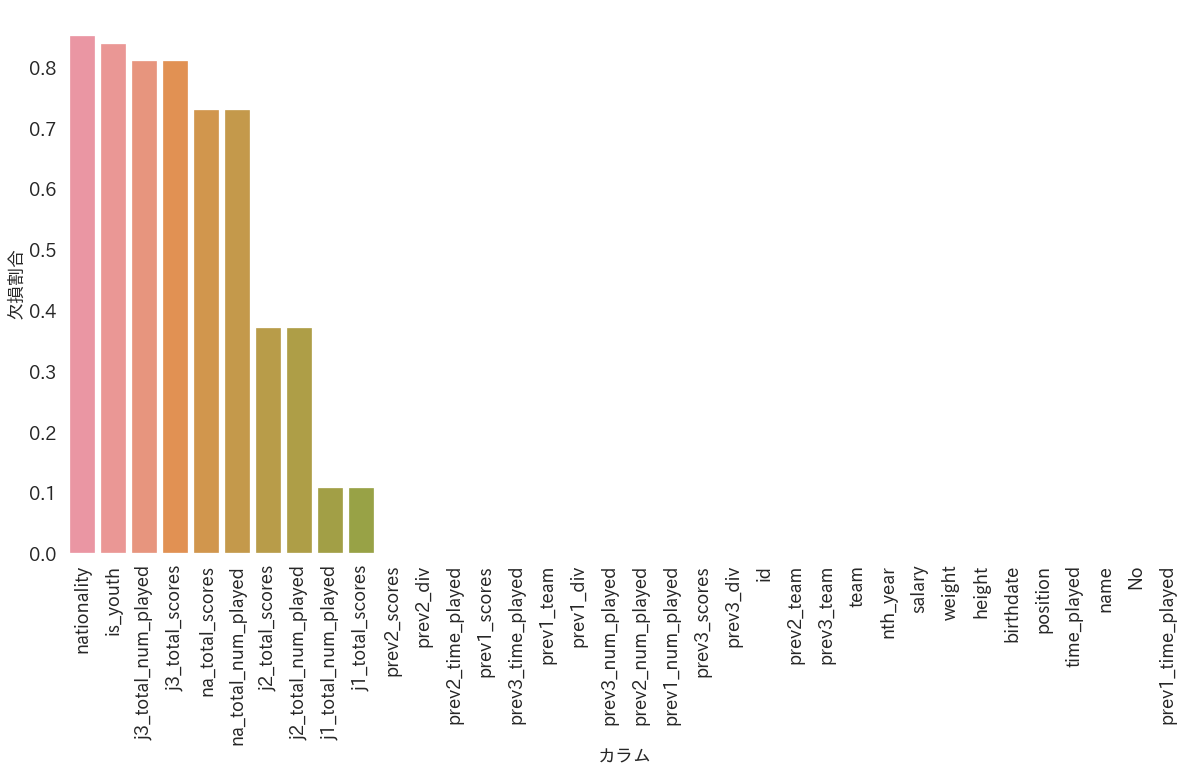

In [23]:
# 欠損値の確認
missing_dict = df.isnull().sum()
missing_rate = missing_dict.values / df.shape[0]
df_missing = pd.DataFrame({'カラム': missing_dict.index, '欠損数': missing_dict.values, '欠損割合': missing_rate}).sort_values(by='欠損割合', ascending=False)
df_missing = df_missing.set_index('カラム')

# 欠損割合可視化
plt.figure(figsize=(20, 10))
sns.barplot(df_missing.index, df_missing['欠損割合'])
plt.xlabel("カラム", fontsize=18)
plt.ylabel("欠損割合", fontsize=18)
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.show()

In [24]:
# 1つ以上欠損あるものだけ表示
display(df_missing[df_missing['欠損数']>0])

,欠損数,欠損割合
カラム,,
nationality,395,0.851293
is_youth,389,0.838362
j3_total_num_played,376,0.810345
j3_total_scores,376,0.810345
na_total_scores,338,0.728448
na_total_num_played,338,0.728448
j2_total_scores,172,0.370690
j2_total_num_played,172,0.370690
j1_total_num_played,50,0.107759


In [25]:
# カラムごとのuniqueな数
display('ユニーク数: ', df.nunique().sort_values(ascending=False))

'ユニーク数: '

id                     464
name                   463
birthdate              453
prev1_time_played      360
time_played            353
prev2_time_played      319
prev3_time_played      283
j1_total_num_played    211
j2_total_num_played    125
prev3_team              84
salary                  82
prev2_team              78
prev1_team              65
j1_total_scores         60
na_total_num_played     48
No                      46
prev3_num_played        46
prev2_num_played        44
prev1_num_played        44
j2_total_scores         38
weight                  37
height                  36
j3_total_num_played     29
nth_year                20
prev3_scores            20
prev1_scores            20
prev2_scores            20
nationality             18
team                    18
na_total_scores         15
j3_total_scores          5
prev3_div                5
prev2_div                5
position                 4
prev1_div                4
is_youth                 1
dtype: int64

------------------------------------------------------------
id
# of unique:  464
statistics:  count    464.000000
mean     407.252155
std      205.866768
min        2.000000
25%      244.750000
50%      414.500000
75%      581.250000
max      747.000000
Name: id, dtype: float64


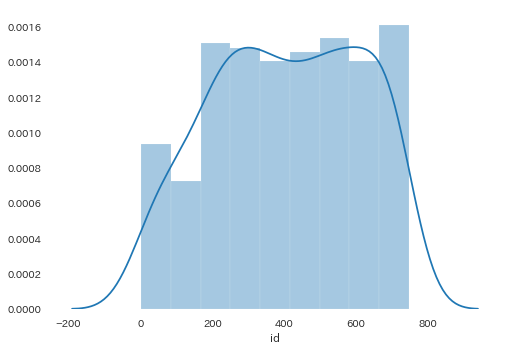

------------------------------------------------------------


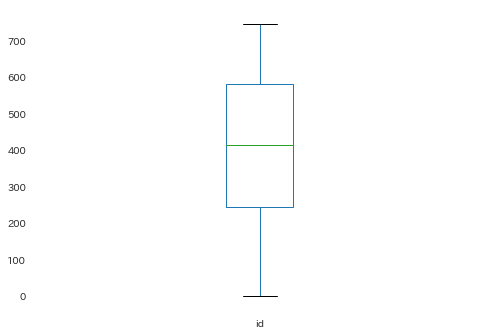

------------------------------------------------------------
team
# of unique:  18
statistics:  count     464
unique     18
top        磐田
freq       31
Name: team, dtype: object
value_counts: 


磐田      0.066810
長崎      0.066810
柏       0.060345
鹿島      0.060345
湘南      0.060345
神戸      0.058190
川崎F     0.058190
横浜FM    0.056034
札幌      0.056034
鳥栖      0.053879
名古屋     0.053879
仙台      0.053879
広島      0.053879
FC東京    0.051724
清水      0.051724
浦和      0.051724
G大阪     0.047414
C大阪     0.038793
Name: team, dtype: float64

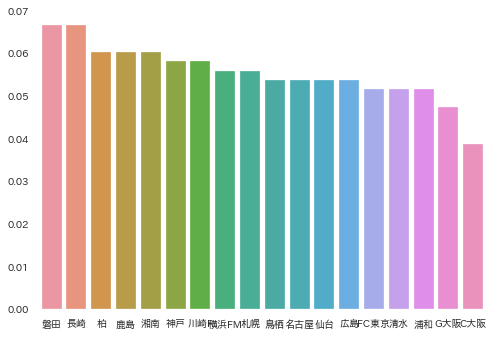

------------------------------------------------------------
No
# of unique:  46
statistics:  count    464.000000
mean      17.767241
std       11.333056
min        1.000000
25%        8.000000
50%       17.000000
75%       26.000000
max       50.000000
Name: No, dtype: float64


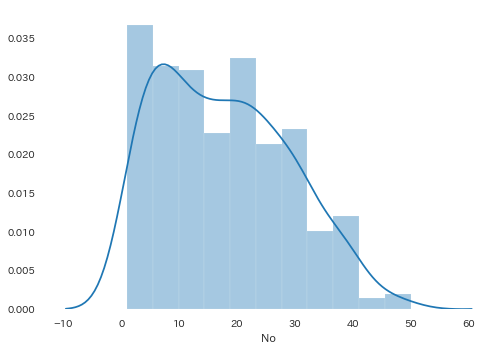

------------------------------------------------------------


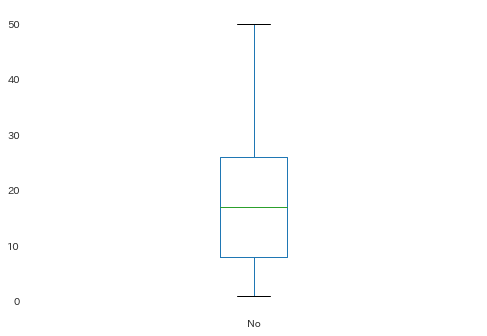

------------------------------------------------------------
name
# of unique:  463
statistics:  count       464
unique      463
top       レアンドロ
freq          2
Name: name, dtype: object
value_counts: 


レアンドロ      0.004310
太田　宏介      0.002155
今野　泰幸      0.002155
亀川　諒史      0.002155
キム　ボギョン    0.002155
             ...   
キム　スンギュ    0.002155
クリスラン      0.002155
青山　敏弘      0.002155
興梠　慎三      0.002155
栗澤　僚一      0.002155
Name: name, Length: 463, dtype: float64

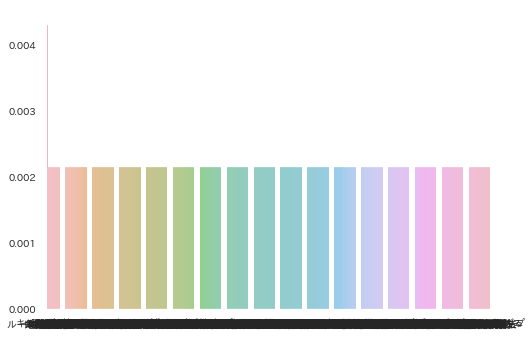

------------------------------------------------------------
time_played
# of unique:  353
statistics:  count     464.000000
mean     1187.521552
std      1036.775123
min         0.000000
25%       187.000000
50%      1016.500000
75%      2092.500000
max      3060.000000
Name: time_played, dtype: float64


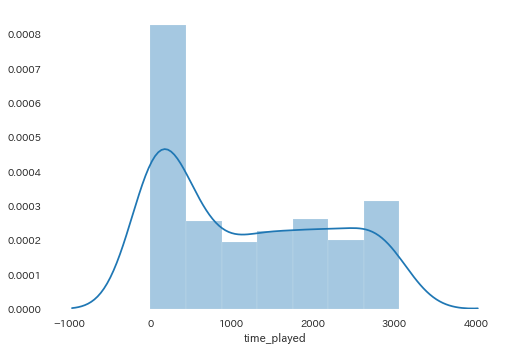

------------------------------------------------------------


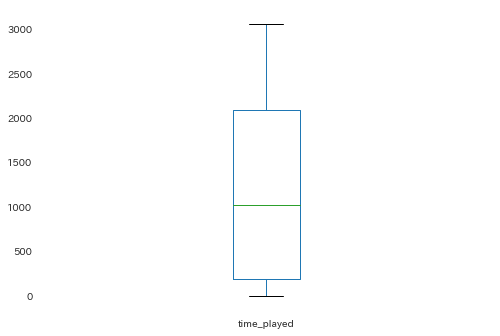

------------------------------------------------------------
position
# of unique:  4
statistics:  count     464
unique      4
top        MF
freq      183
Name: position, dtype: object
value_counts: 


MF    0.394397
DF    0.312500
FW    0.189655
GK    0.103448
Name: position, dtype: float64

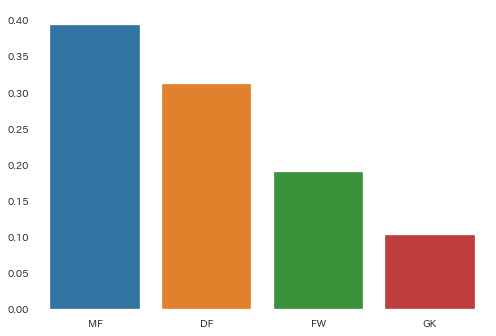

------------------------------------------------------------
birthdate
# of unique:  453
statistics:  count            464
unique           453
top       1989-12-02
freq               2
Name: birthdate, dtype: object
value_counts: 


1989-12-02    0.004310
1993-05-12    0.004310
1989-10-02    0.004310
1987-06-30    0.004310
1989-08-04    0.004310
                ...   
1986-06-16    0.002155
1993-05-04    0.002155
1988-08-08    0.002155
1985-01-04    0.002155
1984-08-24    0.002155
Name: birthdate, Length: 453, dtype: float64

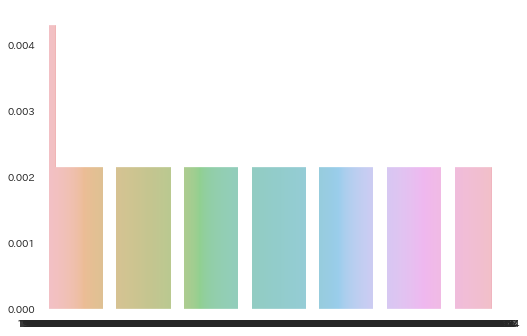

------------------------------------------------------------
height
# of unique:  36
statistics:  count    464.00000
mean     178.43319
std        6.58979
min      155.00000
25%      173.00000
50%      178.00000
75%      183.00000
max      197.00000
Name: height, dtype: float64


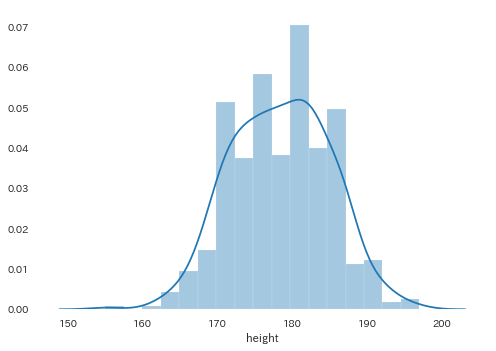

------------------------------------------------------------


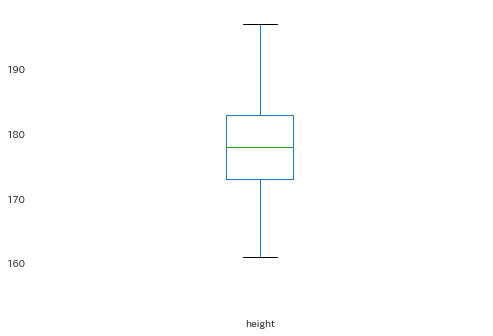

------------------------------------------------------------
weight
# of unique:  37
statistics:  count    464.000000
mean      73.146552
std        6.445658
min       56.000000
25%       68.000000
50%       73.000000
75%       77.000000
max       93.000000
Name: weight, dtype: float64


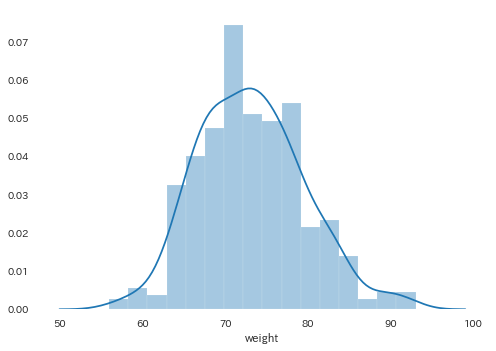

------------------------------------------------------------


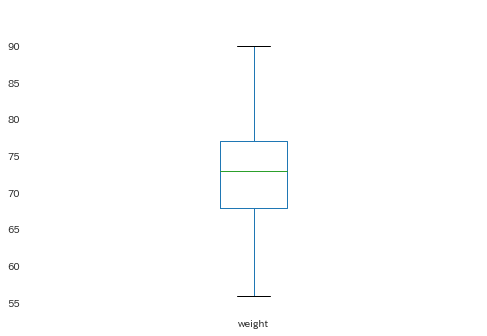

------------------------------------------------------------
salary
# of unique:  82
statistics:  count     464
unique     82
top       480
freq       24
Name: salary, dtype: object
value_counts: 


480      0.051724
3000     0.049569
2000     0.043103
4000     0.038793
2300     0.034483
           ...   
12000    0.002155
6700     0.002155
14500    0.002155
7200     0.002155
3700     0.002155
Name: salary, Length: 82, dtype: float64

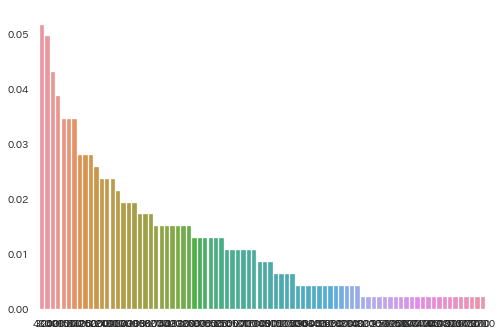

------------------------------------------------------------
nth_year
# of unique:  20
statistics:  count    464.000000
mean       4.021552
std        3.618940
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       21.000000
Name: nth_year, dtype: float64


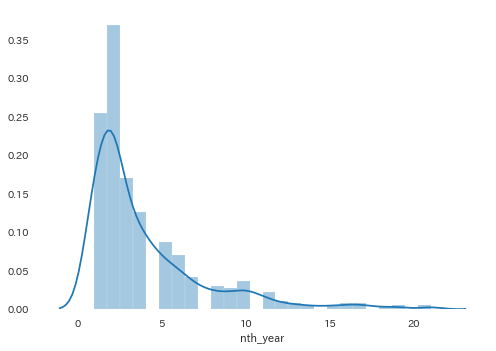

------------------------------------------------------------


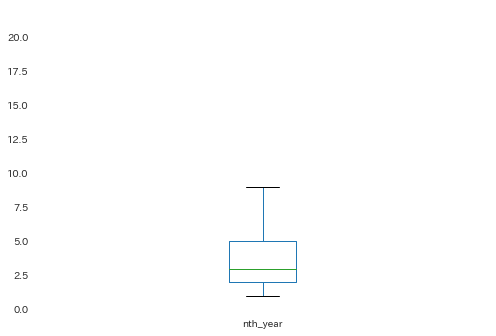

------------------------------------------------------------
is_youth
# of unique:  1
statistics:  count    75.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: is_youth, dtype: float64


/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


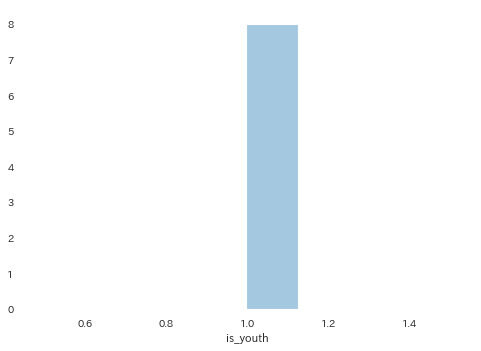

------------------------------------------------------------


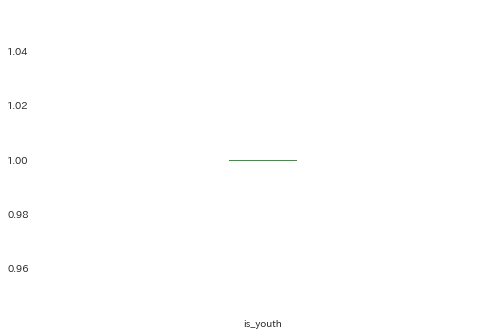

------------------------------------------------------------
nationality
# of unique:  18
statistics:  count         69
unique        18
top       brazil
freq          28
Name: nationality, dtype: object
value_counts: 


NaN                  0.851293
brazil               0.060345
korea                0.045259
australia            0.006466
croatia              0.004310
thailand             0.004310
curacao              0.002155
uzbekistan           0.002155
spain                0.002155
columbia             0.002155
england              0.002155
portugal             0.002155
serbia               0.002155
germany              0.002155
russia               0.002155
poland               0.002155
spain・macedonia      0.002155
slovenia             0.002155
australia・croatia    0.002155
Name: nationality, dtype: float64

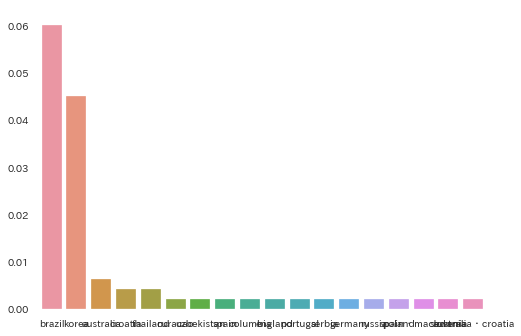

------------------------------------------------------------
j1_total_num_played
# of unique:  211
statistics:  count    414.000000
mean     106.997585
std      110.664130
min        0.000000
25%       23.000000
50%       69.000000
75%      161.250000
max      571.000000
Name: j1_total_num_played, dtype: float64


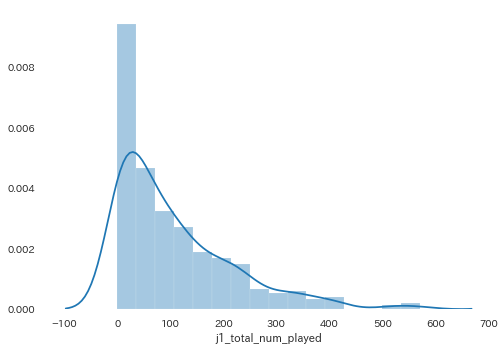

------------------------------------------------------------


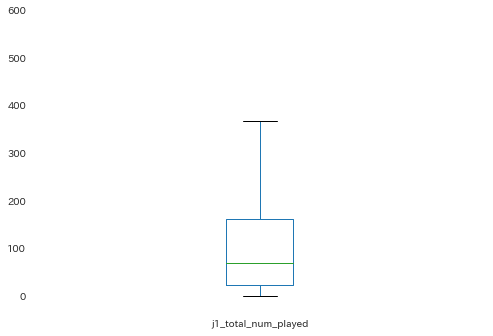

------------------------------------------------------------
j1_total_scores
# of unique:  60
statistics:  count    414.000000
mean      11.243961
std       21.454178
min        0.000000
25%        0.000000
50%        4.000000
75%       12.000000
max      179.000000
Name: j1_total_scores, dtype: float64


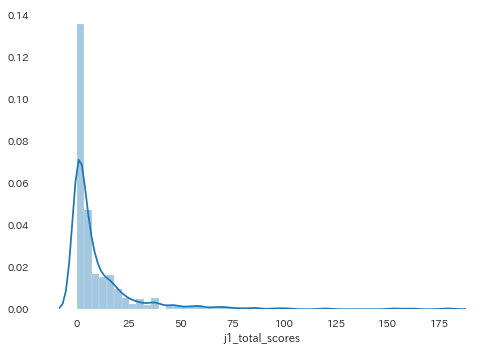

------------------------------------------------------------


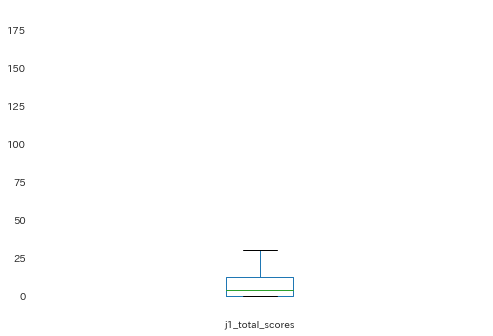

------------------------------------------------------------
j2_total_num_played
# of unique:  125
statistics:  count    292.000000
mean      62.801370
std       55.461094
min        0.000000
25%       29.000000
50%       42.000000
75%       86.250000
max      314.000000
Name: j2_total_num_played, dtype: float64


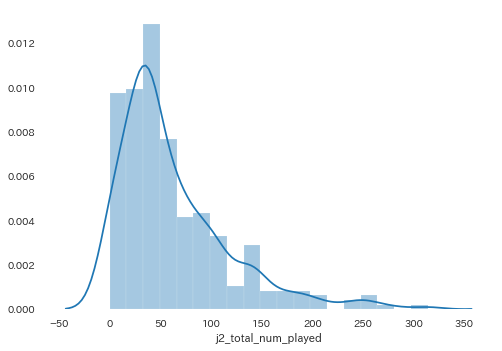

------------------------------------------------------------


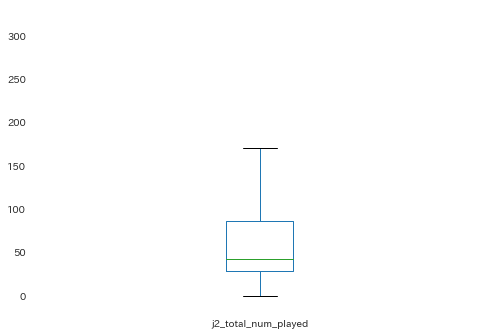

------------------------------------------------------------
j2_total_scores
# of unique:  38
statistics:  count    292.000000
mean       7.119863
std       11.357182
min        0.000000
25%        0.000000
50%        3.000000
75%        9.000000
max       85.000000
Name: j2_total_scores, dtype: float64


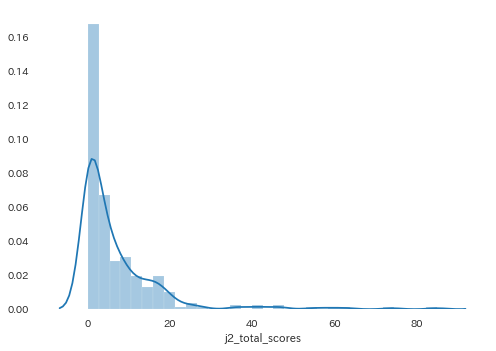

------------------------------------------------------------


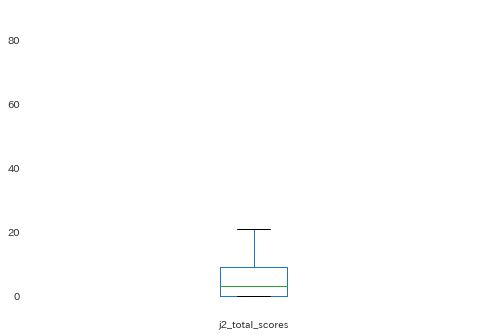

------------------------------------------------------------
j3_total_num_played
# of unique:  29
statistics:  count    88.000000
mean      9.795455
std      11.302689
min       0.000000
25%       2.000000
50%       5.000000
75%      14.000000
max      63.000000
Name: j3_total_num_played, dtype: float64


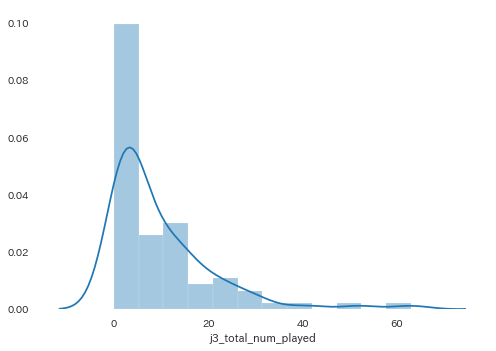

------------------------------------------------------------


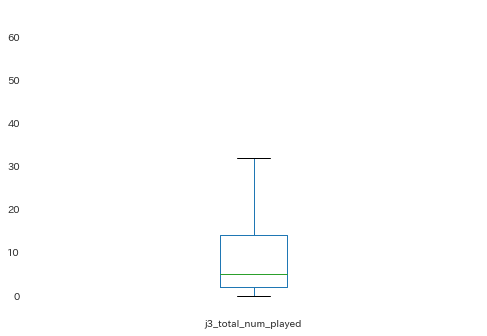

------------------------------------------------------------
j3_total_scores
# of unique:  5
statistics:  count    88.000000
mean      0.590909
std       1.068207
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       7.000000
Name: j3_total_scores, dtype: float64


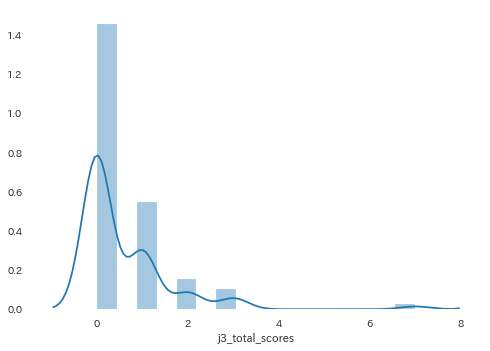

------------------------------------------------------------


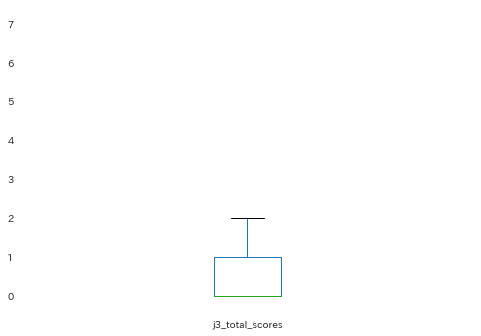

------------------------------------------------------------
na_total_num_played
# of unique:  48
statistics:  count    126.000000
mean      18.563492
std       28.350237
min        0.000000
25%        2.000000
50%        6.000000
75%       20.000000
max      152.000000
Name: na_total_num_played, dtype: float64


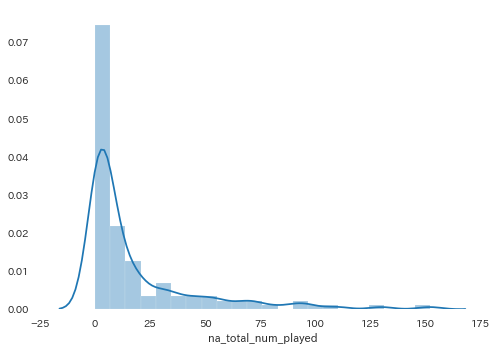

------------------------------------------------------------


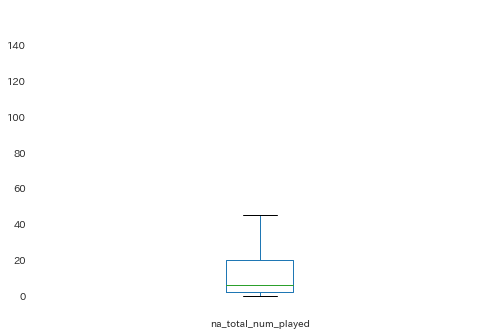

------------------------------------------------------------
na_total_scores
# of unique:  15
statistics:  count    126.000000
mean       2.515873
std        6.670213
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       49.000000
Name: na_total_scores, dtype: float64


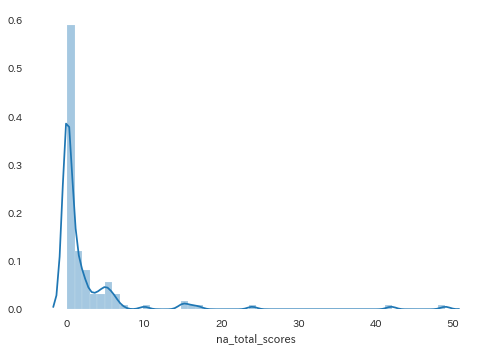

------------------------------------------------------------


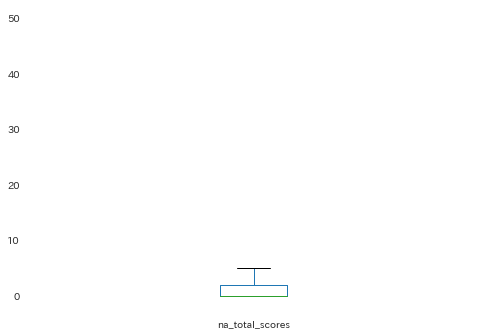

------------------------------------------------------------
prev3_team
# of unique:  84
statistics:  count     464
unique     84
top         -
freq       65
Name: prev3_team, dtype: object
value_counts: 


-              0.140086
横浜FM           0.047414
浦和             0.043103
川崎F            0.040948
柏              0.038793
                 ...   
ITA・ENG・COL    0.002155
徳島             0.002155
CYP            0.002155
SUI            0.002155
C大阪・SPA        0.002155
Name: prev3_team, Length: 84, dtype: float64

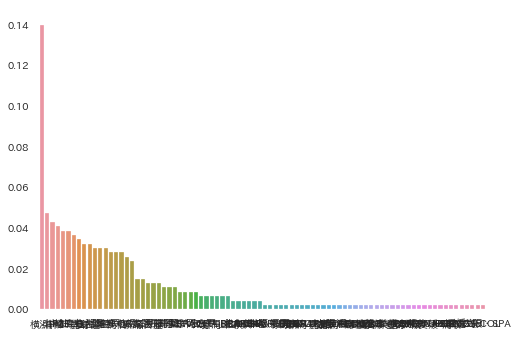

------------------------------------------------------------
prev2_team
# of unique:  78
statistics:  count     464
unique     78
top         -
freq       37
Name: prev2_team, dtype: object
value_counts: 


-          0.079741
川崎F        0.047414
FC東京       0.045259
横浜FM       0.045259
仙台         0.043103
             ...   
横浜FC       0.002155
浦和・鳥取      0.002155
DEN        0.002155
甲府・柏       0.002155
GRE・ITA    0.002155
Name: prev2_team, Length: 78, dtype: float64

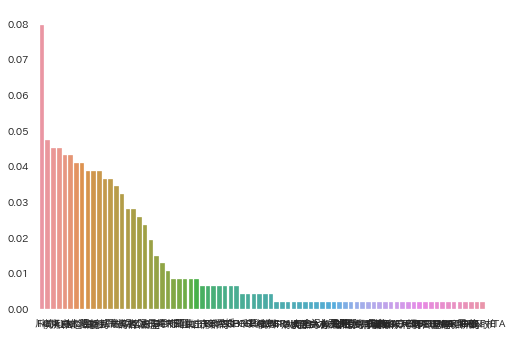

------------------------------------------------------------
prev1_team
# of unique:  65
statistics:  count     464
unique     65
top        磐田
freq       28
Name: prev1_team, dtype: object
value_counts: 


磐田          0.060345
横浜FM        0.056034
神戸          0.053879
柏           0.051724
川崎F         0.051724
              ...   
FC東京・KOR    0.002155
鹿島・G大阪      0.002155
SRB         0.002155
千葉・G大阪      0.002155
横浜FM・福岡     0.002155
Name: prev1_team, Length: 65, dtype: float64

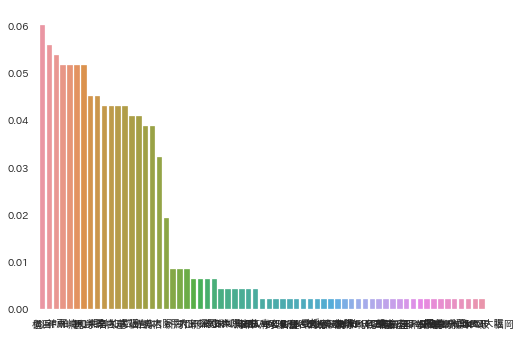

------------------------------------------------------------
prev3_div
# of unique:  5
statistics:  count     464
unique      5
top         1
freq      248
Name: prev3_div, dtype: object
value_counts: 


1    0.534483
2    0.198276
-    0.140086
9    0.118534
3    0.008621
Name: prev3_div, dtype: float64

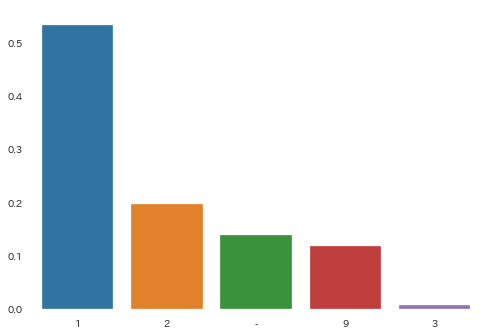

------------------------------------------------------------
prev2_div
# of unique:  5
statistics:  count     464
unique      5
top         1
freq      285
Name: prev2_div, dtype: object
value_counts: 


1    0.614224
2    0.191810
9    0.103448
-    0.079741
3    0.010776
Name: prev2_div, dtype: float64

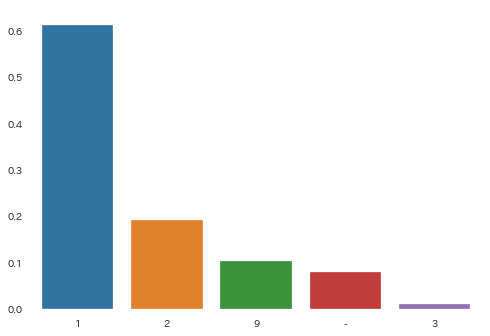

------------------------------------------------------------
prev1_div
# of unique:  4
statistics:  count     464
unique      4
top         1
freq      355
Name: prev1_div, dtype: object
value_counts: 


1    0.765086
2    0.178879
9    0.036638
-    0.019397
Name: prev1_div, dtype: float64

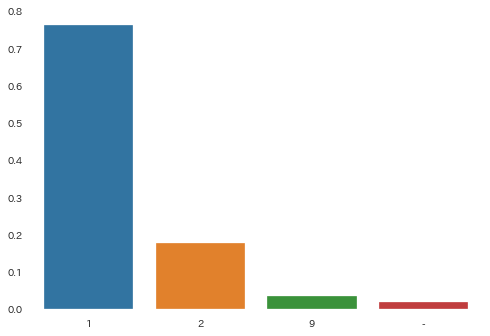

------------------------------------------------------------
prev3_num_played
# of unique:  46
statistics:  count     464
unique     46
top         -
freq       65
Name: prev3_num_played, dtype: object
value_counts: 


-     0.140086
0     0.084052
33    0.060345
31    0.051724
34    0.049569
32    0.049569
30    0.043103
19    0.028017
29    0.025862
22    0.025862
3     0.023707
20    0.023707
13    0.023707
28    0.021552
35    0.017241
18    0.017241
12    0.017241
25    0.017241
26    0.017241
21    0.017241
24    0.015086
37    0.015086
7     0.015086
39    0.012931
16    0.012931
27    0.012931
1     0.012931
6     0.010776
17    0.010776
11    0.010776
15    0.010776
5     0.010776
4     0.010776
14    0.008621
23    0.008621
9     0.008621
36    0.008621
42    0.008621
41    0.008621
10    0.008621
2     0.006466
8     0.006466
40    0.004310
51    0.002155
38    0.002155
46    0.002155
Name: prev3_num_played, dtype: float64

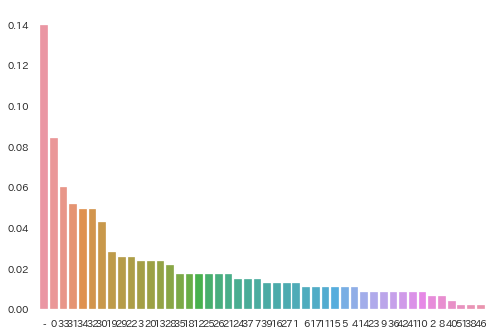

------------------------------------------------------------
prev2_num_played
# of unique:  44
statistics:  count     464
unique     44
top         -
freq       37
Name: prev2_num_played, dtype: object
value_counts: 


-     0.079741
0     0.075431
34    0.064655
33    0.040948
29    0.040948
15    0.038793
30    0.036638
32    0.036638
28    0.034483
26    0.032328
24    0.030172
31    0.030172
19    0.028017
18    0.028017
17    0.025862
27    0.025862
21    0.023707
14    0.021552
12    0.019397
23    0.019397
1     0.017241
13    0.017241
7     0.017241
5     0.017241
42    0.015086
35    0.015086
22    0.015086
4     0.012931
10    0.012931
20    0.012931
11    0.010776
2     0.010776
25    0.010776
39    0.010776
6     0.010776
41    0.010776
16    0.008621
40    0.008621
8     0.008621
9     0.006466
3     0.006466
37    0.004310
38    0.004310
36    0.002155
Name: prev2_num_played, dtype: float64

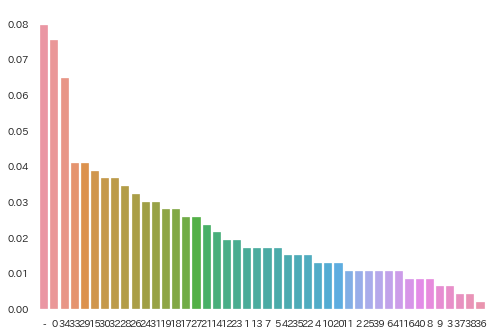

------------------------------------------------------------
prev1_num_played
# of unique:  44
statistics:  count     464
unique     44
top         0
freq       43
Name: prev1_num_played, dtype: object
value_counts: 


0     0.092672
34    0.053879
33    0.049569
14    0.043103
31    0.040948
26    0.038793
30    0.036638
16    0.034483
32    0.032328
24    0.030172
21    0.028017
23    0.028017
18    0.028017
5     0.025862
8     0.023707
29    0.023707
25    0.021552
22    0.021552
9     0.021552
15    0.019397
6     0.019397
-     0.019397
11    0.017241
17    0.017241
27    0.017241
1     0.017241
28    0.017241
20    0.017241
10    0.017241
2     0.017241
19    0.015086
3     0.015086
13    0.010776
37    0.010776
12    0.010776
39    0.010776
4     0.010776
42    0.008621
36    0.008621
40    0.008621
7     0.006466
41    0.006466
38    0.004310
35    0.002155
Name: prev1_num_played, dtype: float64

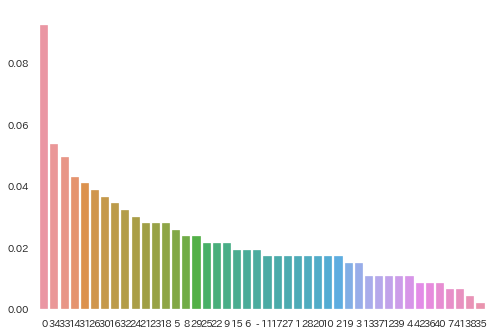

------------------------------------------------------------
prev3_scores
# of unique:  20
statistics:  count     464
unique     20
top         0
freq      175
Name: prev3_scores, dtype: object
value_counts: 


0     0.377155
-     0.140086
1     0.137931
3     0.077586
2     0.075431
4     0.051724
7     0.025862
5     0.023707
8     0.017241
6     0.017241
9     0.010776
10    0.008621
13    0.008621
12    0.008621
20    0.006466
11    0.004310
17    0.002155
15    0.002155
14    0.002155
23    0.002155
Name: prev3_scores, dtype: float64

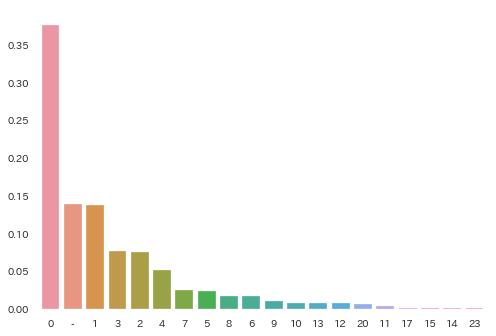

------------------------------------------------------------
prev2_scores
# of unique:  20
statistics:  count     464
unique     20
top         0
freq      197
Name: prev2_scores, dtype: object
value_counts: 


0     0.424569
1     0.176724
-     0.079741
2     0.075431
4     0.053879
3     0.051724
5     0.036638
8     0.012931
9     0.012931
7     0.010776
12    0.010776
6     0.010776
14    0.008621
11    0.008621
10    0.008621
15    0.004310
19    0.004310
13    0.004310
16    0.002155
26    0.002155
Name: prev2_scores, dtype: float64

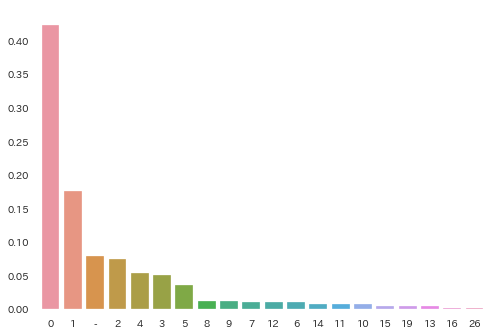

------------------------------------------------------------
prev1_scores
# of unique:  20
statistics:  count     464
unique     20
top         0
freq      210
Name: prev1_scores, dtype: object
value_counts: 


0     0.452586
1     0.168103
2     0.114224
3     0.058190
5     0.047414
4     0.036638
6     0.019397
-     0.019397
8     0.017241
7     0.015086
10    0.015086
11    0.006466
9     0.006466
14    0.004310
19    0.004310
12    0.004310
23    0.004310
22    0.002155
18    0.002155
20    0.002155
Name: prev1_scores, dtype: float64

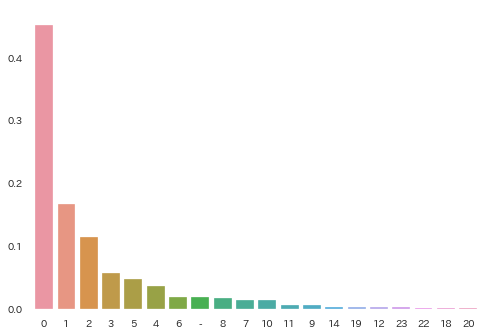

------------------------------------------------------------
prev3_time_played
# of unique:  283
statistics:  count     464
unique    283
top         -
freq      120
Name: prev3_time_played, dtype: object
value_counts: 


-       0.258621
0       0.073276
3060    0.021552
2970    0.006466
473     0.004310
          ...   
2766    0.002155
957     0.002155
2692    0.002155
2147    0.002155
1743    0.002155
Name: prev3_time_played, Length: 283, dtype: float64

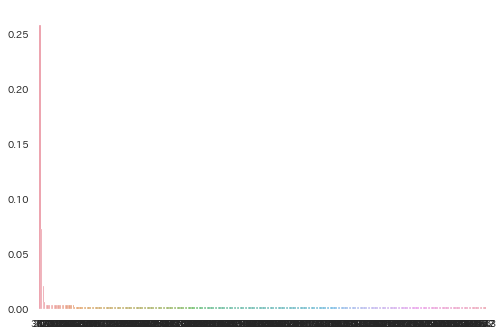

------------------------------------------------------------
prev2_time_played
# of unique:  319
statistics:  count     464
unique    319
top         -
freq       85
Name: prev2_time_played, dtype: object
value_counts: 


-       0.183190
0       0.066810
3060    0.021552
2970    0.008621
1635    0.004310
          ...   
1956    0.002155
2700    0.002155
1305    0.002155
1834    0.002155
1740    0.002155
Name: prev2_time_played, Length: 319, dtype: float64

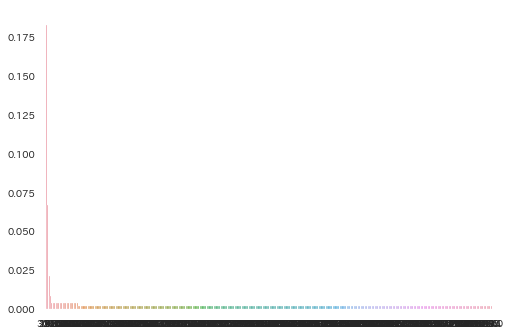

------------------------------------------------------------
prev1_time_played
# of unique:  360
statistics:  count     464
unique    360
top         0
freq       41
Name: prev1_time_played, dtype: object
value_counts: 


0       0.088362
-       0.056034
3060    0.019397
1327    0.006466
810     0.006466
          ...   
3046    0.002155
174     0.002155
1838    0.002155
1175    0.002155
1626    0.002155
Name: prev1_time_played, Length: 360, dtype: float64

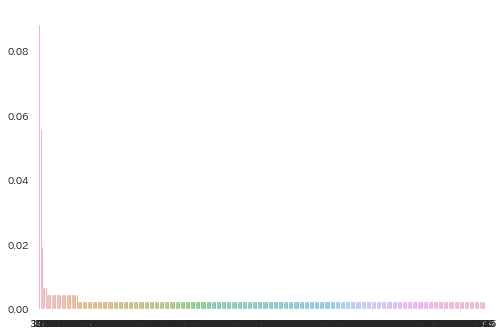

In [26]:
# 中身の確認
for col in df.columns:
    print('-'*60)
    print(col)
    print('# of unique: ', df[col].nunique())
    print('statistics: ', df[col].describe())
    if df[col].dtype=='object':
        print('value_counts: ')
        val_cnt = df[col].value_counts(dropna=False, normalize=True).sort_values(ascending=False)
        display(val_cnt)
        sns.barplot(x=val_cnt.index, y=val_cnt.values)
        plt.show()
        
    else:
        sns.distplot(df[col].dropna())
        plt.show()
        
        # 箱ひげ図
        print('-'*60)
        df[col].plot.box()
        plt.show()

#         # log10
#         df_rm0 =df[df[col]!=0][col]
#         sns.distplot(np.log10(df_rm0).dropna())
#         plt.show()

In [19]:
df["prev2_time_played"].notnull()

0      True
1      True
2      True
3      True
4      True
       ... 
459    True
460    True
461    True
462    True
463    True
Name: prev2_time_played, Length: 464, dtype: bool

In [25]:
 df.iloc[462]["prev2_time_played"]

'0'

In [24]:
 df.loc[df["prev2_time_played"]==0]

,id,team,No,name,time_played,position,birthdate,height,weight,salary,nth_year,is_youth,nationality,j1_total_num_played,j1_total_scores,j2_total_num_played,j2_total_scores,j3_total_num_played,j3_total_scores,na_total_num_played,na_total_scores,prev3_team,prev2_team,prev1_team,prev3_div,prev2_div,prev1_div,prev3_num_played,prev2_num_played,prev1_num_played,prev3_scores,prev2_scores,prev1_scores,prev3_time_played,prev2_time_played,prev1_time_played


In [22]:
 df.loc[(df["prev2_time_played"]!=0.), "prev2_time_played"]

0      3733
1      2725
2      1800
3       570
4      1635
       ... 
459     816
460       -
461       0
462       0
463    3288
Name: prev2_time_played, Length: 464, dtype: object

In [17]:
df.loc[(df["prev2_time_played"].notnull()), "prev1_time_played"] / df.loc[(df["prev2_time_played"].notnull()), "prev2_time_played"]

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [31]:
print([0,1])

[0, 1]


In [33]:
print([str(0)+1, str(1)])

TypeError: must be str, not int

In [15]:
df["nationality"] = df["nationality"].isnull()*1

In [16]:
df["nationality"].value_counts(dropna=False)

1    395
0     69
Name: nationality, dtype: int64

In [37]:
df["nationality"] = df["nationality"].astype("str")#.value_counts()

In [38]:
df["nationality"]+1

TypeError: must be str, not int

In [30]:
df["team"].value_counts(dropna=False)

磐田      31
長崎      31
湘南      28
柏       28
鹿島      28
神戸      27
川崎F     27
横浜FM    26
札幌      26
仙台      25
名古屋     25
広島      25
鳥栖      25
FC東京    24
浦和      24
清水      24
G大阪     22
C大阪     18
Name: team, dtype: int64

In [28]:
# 目的変数との相関
corr_list = []
col_list = []
target = 'time_played'
for col in df.select_dtypes(include='number').columns:
    if col not in [target]:
        col_list.append(col)
        corr_list.append(np.corrcoef(df[col], df[target])[0,1])
df_corr = pd.DataFrame({'feature': col_list, 'corr_with_object': corr_list}).sort_values(by='corr_with_object', ascending=False)
display('目的変数との相関: ', df_corr.head(20))

'目的変数との相関: '

,feature,corr_with_object
4,nth_year,0.069003
2,height,0.055818
3,weight,0.050741
0,id,-0.118982
1,No,-0.191122
5,is_youth,NaN
6,j1_total_num_played,NaN
7,j1_total_scores,NaN
8,j2_total_num_played,NaN
9,j2_total_scores,NaN
